In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images
!unzip -q deepfake-and-real-images.zip -d deepfake_data

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
 99% 1.67G/1.68G [00:19<00:00, 227MB/s]
100% 1.68G/1.68G [00:19<00:00, 91.3MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

img_size = (64, 64)
batch_size = 32

train_ds = image_dataset_from_directory(
    "deepfake_data/Dataset/Train",
    labels='inferred',
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    "deepfake_data/Dataset/Validation",
    labels='inferred',
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    "deepfake_data/Dataset/Test",
    labels='inferred',
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.
Found 10905 files belonging to 2 classes.


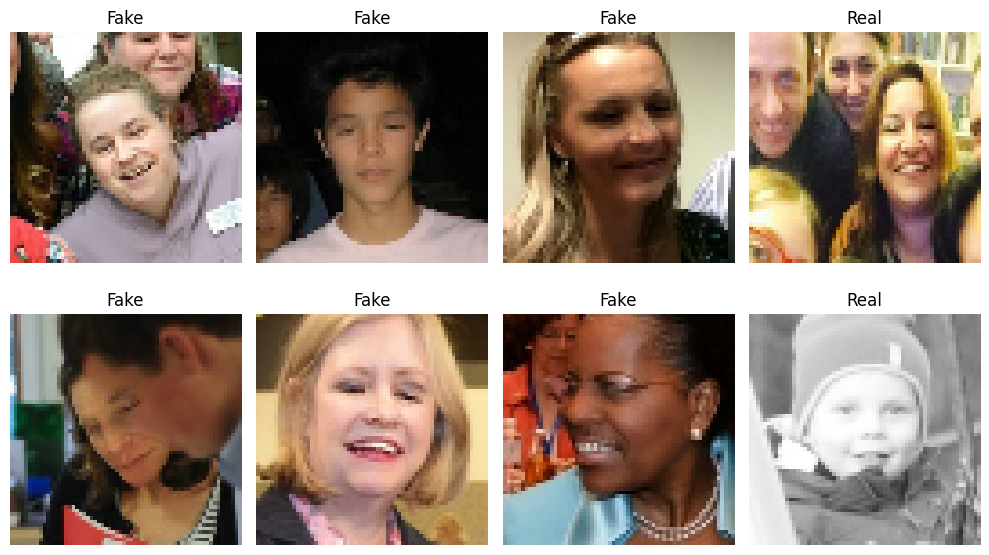

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

def show_batch(dataset):
    images, labels = next(iter(dataset))
    plt.figure(figsize=(10, 6))
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = "Real" if labels[i] == 1 else "Fake"
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_batch(train_ds)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds, validation_data=val_ds, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - accuracy: 0.8041 - loss: 0.4065 - val_accuracy: 0.8722 - val_loss: 0.2896
Epoch 2/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9117 - loss: 0.2095 - val_accuracy: 0.8880 - val_loss: 0.2569
Epoch 3/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 78s 18ms/step - accuracy: 0.9335 - loss: 0.1599 - val_accuracy: 0.8830 - val_loss: 0.2804
Epoch 4/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 79s 18ms/step - accuracy: 0.9471 - loss: 0.1286 - val_accuracy: 0.9113 - val_loss: 0.2361
Epoch 5/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 76s 17ms/step - accuracy: 0.9574 - loss: 0.1073 - val_accuracy: 0.9141 - val_loss: 0.2709


In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.2f}")

341/341 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8716 - loss: 0.3864
Test accuracy: 0.88
